# Import libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load data set folder 

In [2]:
dataset_path = "dataset"

# Get all class folder from data set

In [3]:
classes = sorted(os.listdir(dataset_path))
print(f"Number of classes: {len(classes)}")
print(f"Class names: {classes}")

Number of classes: 10
Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# Count total images and per-class distribution

In [4]:
total_images = 0
class_count = []

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    count = len(os.listdir(class_path))
    class_count.append(count)
    total_images += count
    print(f"Class {cls}: {count} images")

print(f"Total images in dataset: {total_images}")

Class 0: 300 images
Class 1: 300 images
Class 2: 300 images
Class 3: 300 images
Class 4: 300 images
Class 5: 300 images
Class 6: 300 images
Class 7: 300 images
Class 8: 300 images
Class 9: 300 images
Total images in dataset: 3000


# Class Distribution Visualization

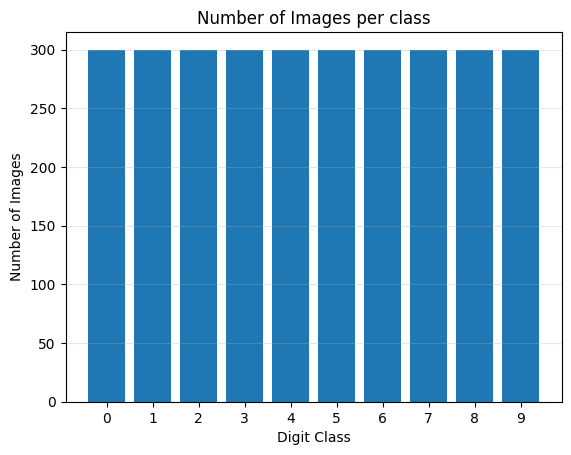

In [5]:
plt.Figure(figsize=(10, 5))
plt.bar(classes, class_count)
plt.title("Number of Images per class")
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")
plt.xticks(classes)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Check image properties (dimensions)

In [6]:
sample_class = classes[0]
sample_path = os.path.join(dataset_path, sample_class)
sample_img = os.path.join(sample_path, os.listdir(sample_path)[0])
img = plt.imread(sample_img)

print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")
print(f"Min pixel value: {img.min()}")
print(f"Max pixel value: {img.max()}")
print(f"Mean pixel value: {img.mean()}")

dimensions = {}
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = plt.imread(img_path)
        dim = img.shape
        dimensions[dim] = dimensions.get(dim, 0) + 1

print("Image dimensions distribution:")
for dim, count in dimensions.items():
    print(f"{dim}: {count} images")

Image shape: (64, 64, 4)
Image dtype: float32
Min pixel value: 0.0
Max pixel value: 1.0
Mean pixel value: 0.29419881105422974
Image dimensions distribution:
(64, 64, 4): 1500 images
(116, 83): 1 images
(162, 104): 1 images
(162, 123): 1 images
(153, 106): 1 images
(147, 92): 1 images
(177, 93): 1 images
(157, 91): 1 images
(158, 96): 1 images
(154, 91): 1 images
(135, 79): 1 images
(130, 79): 1 images
(149, 125): 1 images
(148, 96): 1 images
(138, 112): 1 images
(157, 117): 1 images
(154, 110): 1 images
(143, 99): 1 images
(127, 101): 1 images
(134, 96): 2 images
(147, 95): 1 images
(176, 124): 1 images
(170, 125): 1 images
(161, 110): 1 images
(162, 107): 1 images
(182, 133): 1 images
(183, 131): 1 images
(219, 128): 1 images
(157, 128): 1 images
(181, 120): 1 images
(223, 166): 1 images
(208, 122): 1 images
(201, 156): 1 images
(223, 139): 1 images
(218, 150): 1 images
(255, 133): 1 images
(222, 170): 1 images
(255, 196): 1 images
(177, 113): 2 images
(164, 161): 1 images
(171, 115):

# Show differences between Original, Grayscaled, Normalized

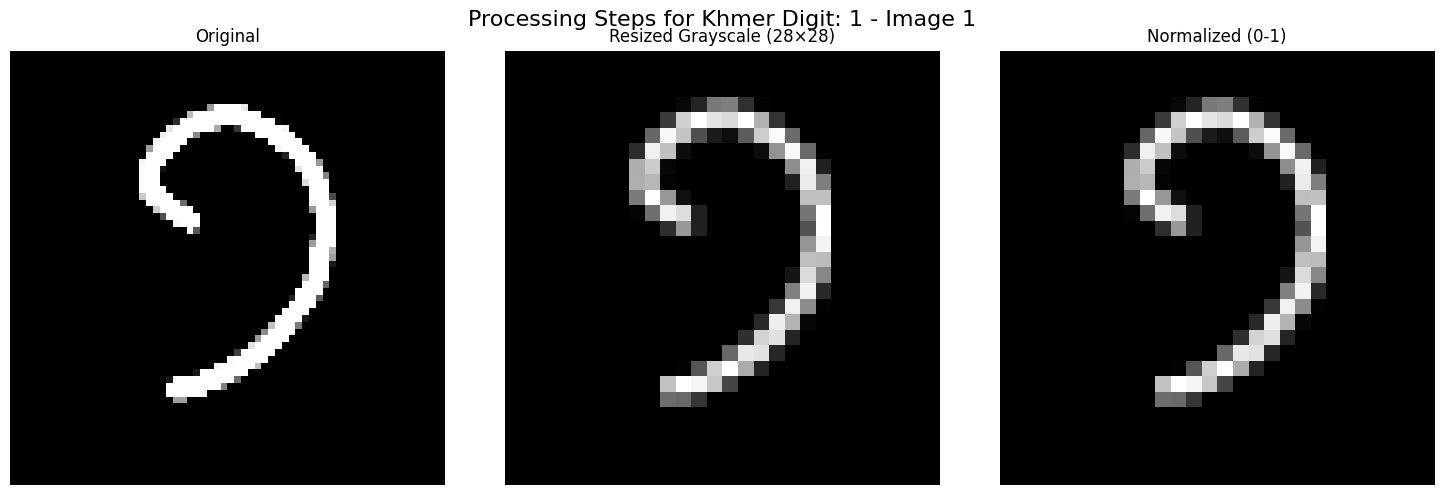

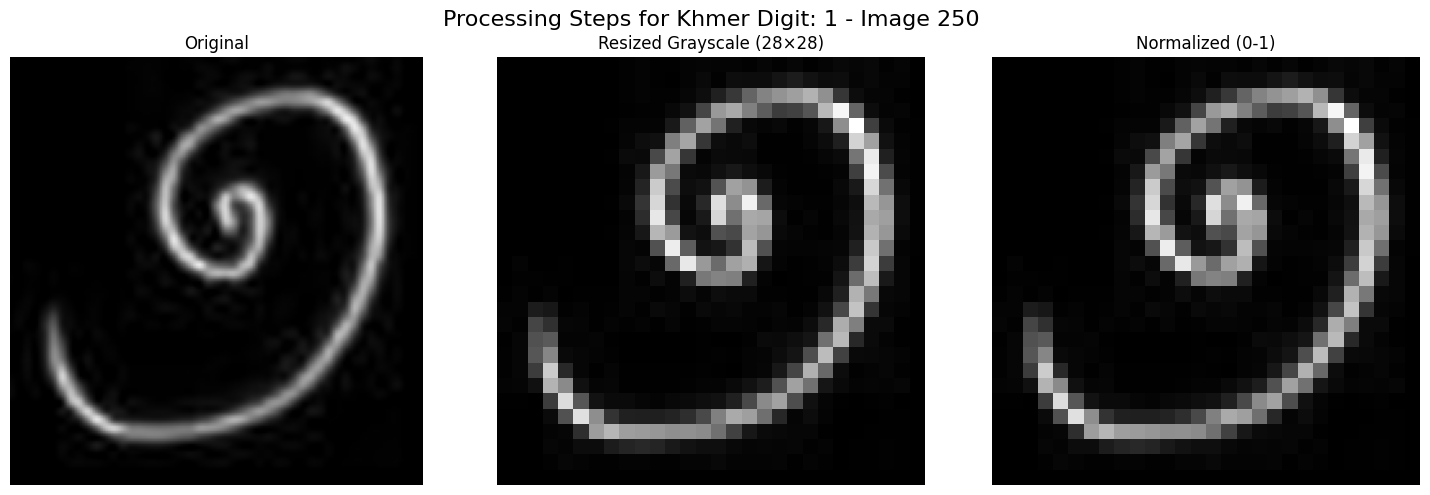

In [37]:
sample_class = classes[1]
sample_path = os.path.join(dataset_path, sample_class)
img_list = os.listdir(sample_path)

indices = [1, 250]

for i, idx in enumerate(indices):
    if idx < len(img_list):
        sample_img_name = img_list[idx]
        img_path = os.path.join(sample_path, sample_img_name)
        original_img = cv2.imread(img_path)
        original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
        resized_gray = cv2.resize(gray_img, (28, 28), interpolation=cv2.INTER_AREA)
        normalized = resized_gray / 255.0
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Original image
        axes[0].imshow(original_rgb)
        axes[0].set_title("Original")
        axes[0].axis('off')
        
        # Resized image
        axes[1].imshow(resized_gray, cmap='gray')
        axes[1].set_title("Resized Grayscale (28×28)")
        axes[1].axis('off')
        
        # Normalized image
        axes[2].imshow(normalized, cmap='gray')
        axes[2].set_title("Normalized (0-1)")
        axes[2].axis('off')
        
        plt.suptitle(f"Processing Steps for Khmer Digit: {sample_class} - Image {idx}", fontsize=16)
        plt.tight_layout()
        plt.show()

# Model Training

In [8]:
from tqdm import tqdm

training_data = []
IMG_SIZE = 28

def create_training_data():
    for category in classes:

        path = os.path.join(dataset_path,category)
        class_num = classes.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

print(len(training_data))

100%|██████████| 300/300 [00:00<00:00, 2173.94it/s]

3000


In [9]:
training_data

[[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 

In [10]:
import random
random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

9
2
0
3
5
2
5
0
3
3


In [12]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [13]:
X[100].shape

(28, 28)

In [14]:
from tensorflow.keras.utils import to_categorical # type: ignore

In [15]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X / 255.0
X[100].shape

(28, 28, 1)

In [16]:
X.shape

(3000, 28, 28, 1)

In [17]:
y = to_categorical(y, num_classes=10)
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [18]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [19]:
y.shape

(3000, 10)

In [20]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LeakyReLU # type: ignore

# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), padding='same', input_shape=(28, 28, 1)))
model.add(LeakyReLU(alpha=0.1))

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Fully Connected Output Layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, validation_split=0.2)

model.summary()

Epoch 1/10


c:\Users\Acmatac\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Acmatac\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2093 - loss: 2.2264 - val_accuracy: 0.5967 - val_loss: 1.5095
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6606 - loss: 1.1728 - val_accuracy: 0.7967 - val_loss: 0.6875
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8334 - loss: 0.5586 - val_accuracy: 0.8500 - val_loss: 0.5219
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8792 - loss: 0.4064 - val_accuracy: 0.8917 - val_loss: 0.4047
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9245 - loss: 0.2869 - val_accuracy: 0.8867 - val_loss: 0.3659
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9412 - loss: 0.2347 - val_accuracy: 0.9150 - val_loss: 0.3130
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9476 - loss: 0.1920 - val_accuracy: 0.9217 - val_loss: 0.2841
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9581 - loss: 0.1602 - val_accuracy: 0.9250 - val_loss: 0.2706
Epo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,304 (87.13 KB)

 Trainable params: 7,434 (29.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,870 (58.09 KB)

c:\Users\Acmatac\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


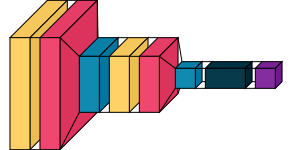

In [21]:
import visualkeras
visualkeras.layered_view(model)

In [22]:
# model.save("digit_model.keras") 

# Testing Evaluation

In [23]:
IMG_SIZE = 28
def prepare_image(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    normalized = resized / 255.0
    reshaped = normalized.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    return reshaped


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


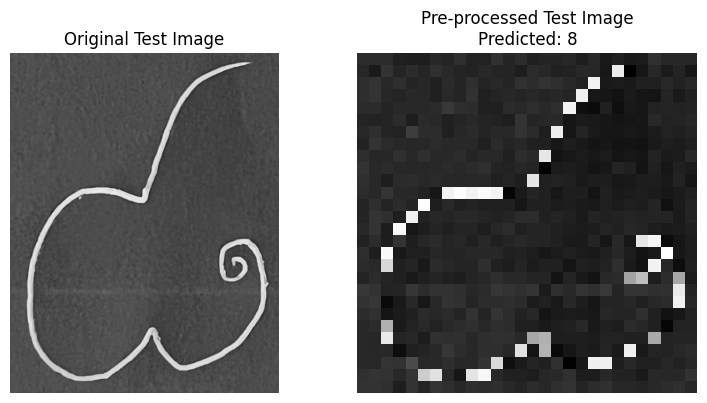

In [24]:
original_img = cv2.imread(r"D:\Seing Ratana Notebook\Khmer_Numeral_Recognition\Test image\8\Capture04.PNG", cv2.IMREAD_COLOR_RGB)

image = prepare_image(r"D:\Seing Ratana Notebook\Khmer_Numeral_Recognition\Test image\8\Capture04.PNG")
model = tf.keras.models.load_model(r'D:\Seing Ratana Notebook\Khmer_Numeral_Recognition\Project_CNN\digit_model.keras')
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_img, cmap='gray')
axes[0].set_title("Original Test Image")
axes[0].axis('off')

axes[1].imshow(image[0].reshape(28, 28), cmap='gray')
axes[1].set_title(f"Pre-processed Test Image\nPredicted: {predicted_label}")
axes[1].axis('off')

plt.tight_layout()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.83      0.95      0.88        20
           3       1.00      1.00      1.00        20
           4       0.90      0.90      0.90        20
           5       1.00      0.95      0.97        20
           6       1.00      0.90      0.95        20
           7       1.00      1.00      1.00        20
           8       0.89      0.85      0.87        20
           9       0.95      1.00      0.98        20

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.95      0.96       200



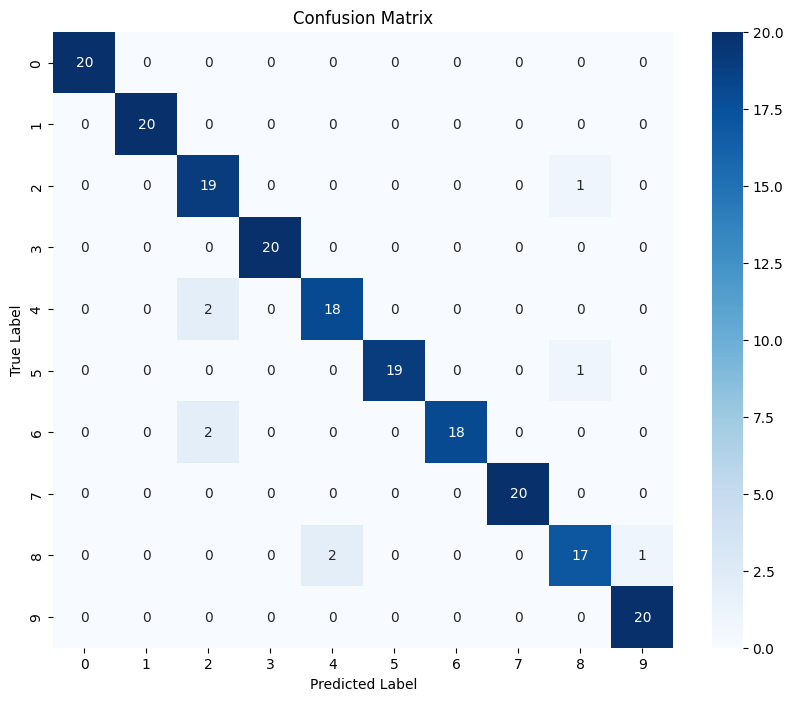


Total incorrect predictions: 9


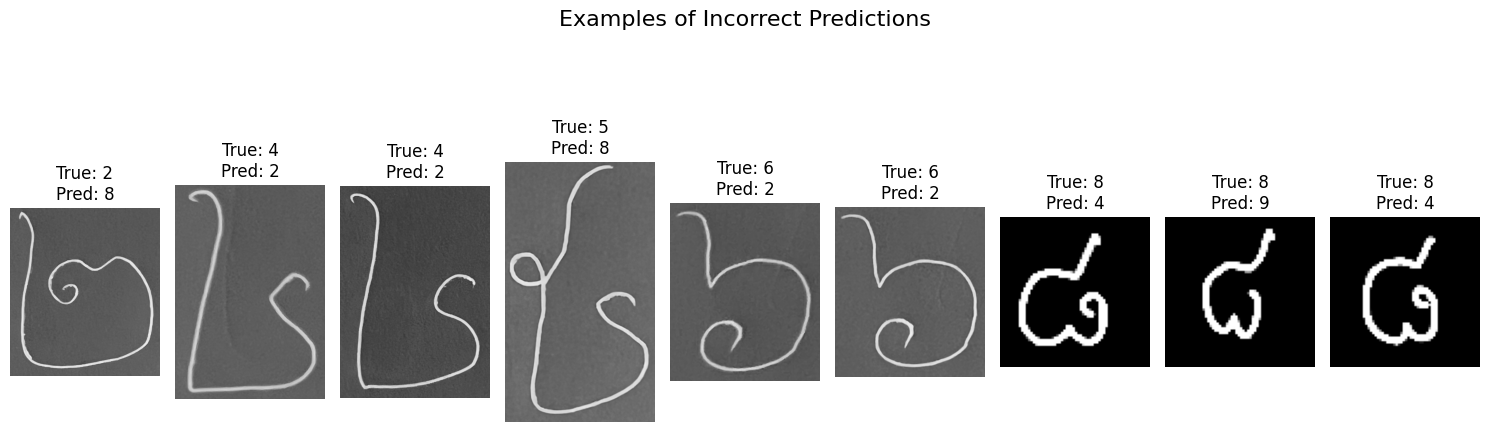

In [25]:
# 1: Define preprocessing function
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    normalized = resized / 255.0
    return normalized

# 2: Load test images and labels
test_dir = r'D:\Seing Ratana Notebook\Khmer_Numeral_Recognition\Test image'
X_test, y_test, image_paths = [], [], []
class_names = sorted(os.listdir(test_dir))

for label in class_names:
    class_path = os.path.join(test_dir, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = preprocess_image(img_path)
        X_test.append(img)
        y_test.append(int(label))
        image_paths.append(img_path)

X_test = np.array(X_test).reshape(-1, 28, 28, 1)
y_test = np.array(y_test)

# 3: Load the trained model
model = tf.keras.models.load_model(r'D:\Seing Ratana Notebook\Khmer_Numeral_Recognition\Project_CNN\digit_model.keras')

# 4: Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# 5: Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# 6: Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 7: Show incorrect predictions
incorrect_indices = np.where(y_pred != y_test)[0]

print(f"\nTotal incorrect predictions: {len(incorrect_indices)}")

# Show 100 incorrect samples
num_to_display = min(100, len(incorrect_indices))
plt.figure(figsize=(15, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    img = cv2.imread(image_paths[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, num_to_display, i+1)
    plt.imshow(img)
    plt.title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Examples of Incorrect Predictions', fontsize=16)
plt.subplots_adjust(top=0.8)
plt.show()